In [36]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
import scipy as scp
from statsmodels.tsa.ar_model import AutoReg
from itertools import product
from pylab import rcParams
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

<Figure size 640x480 with 0 Axes>

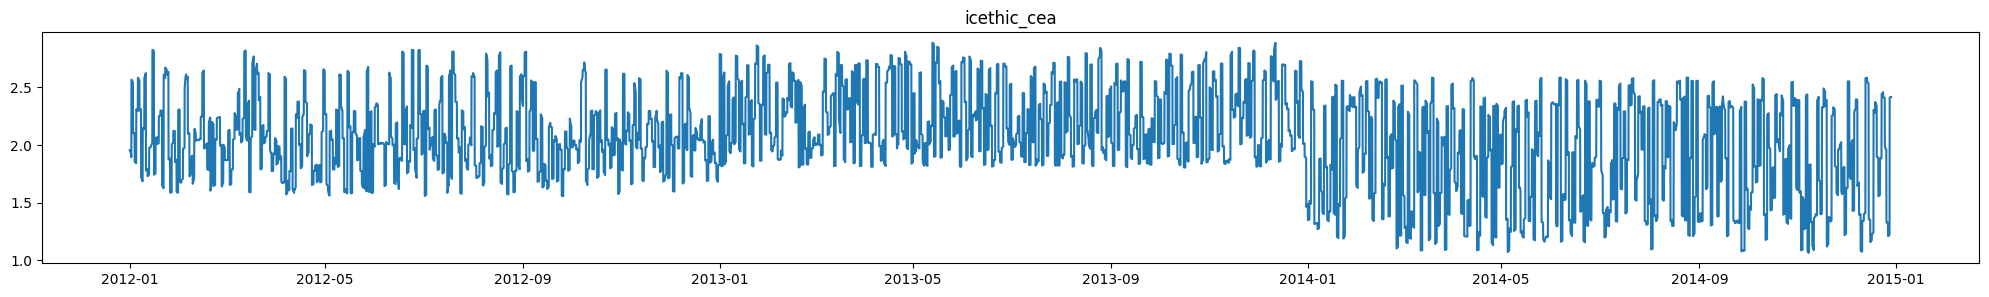

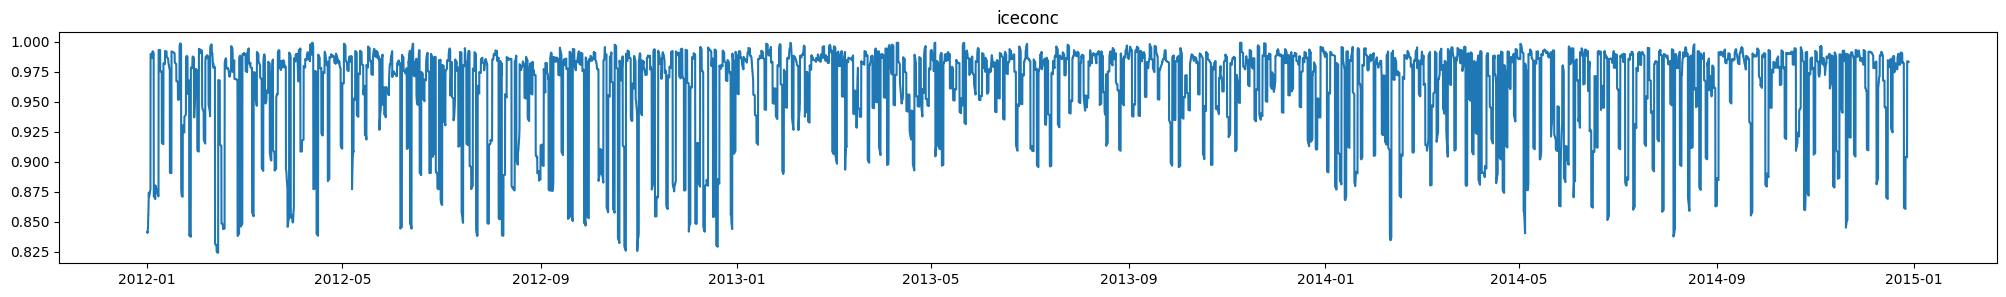

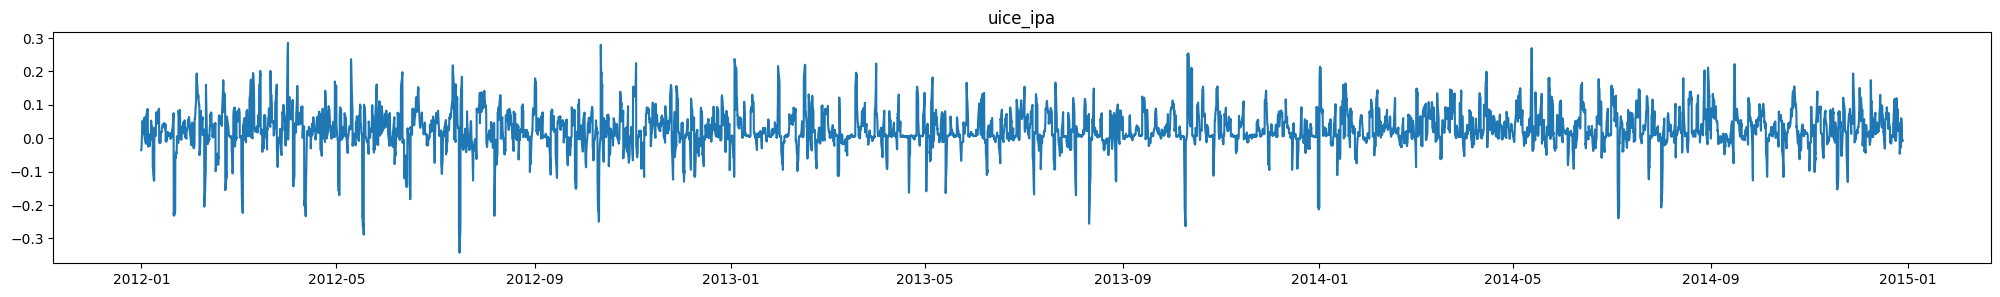

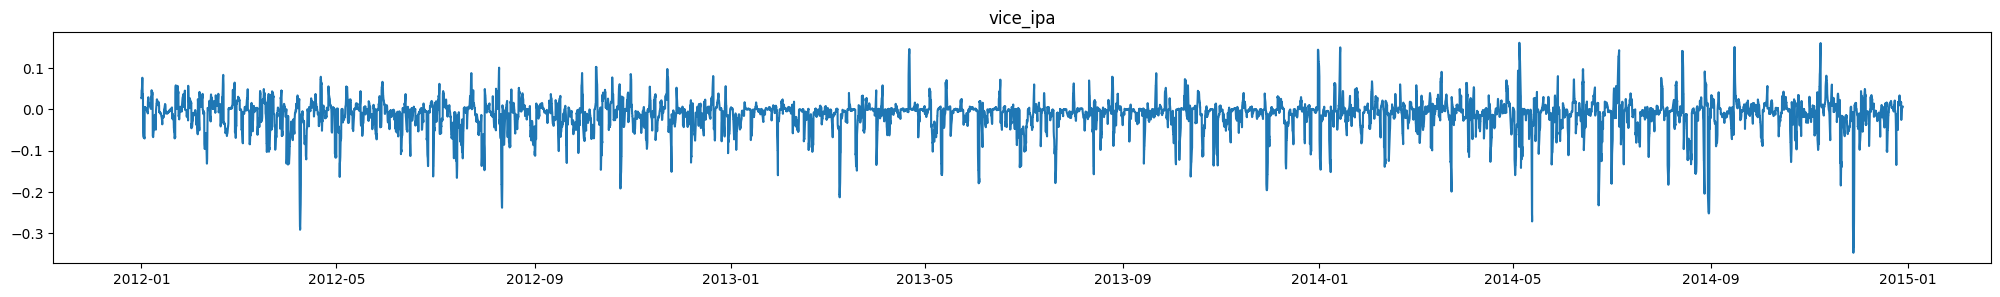

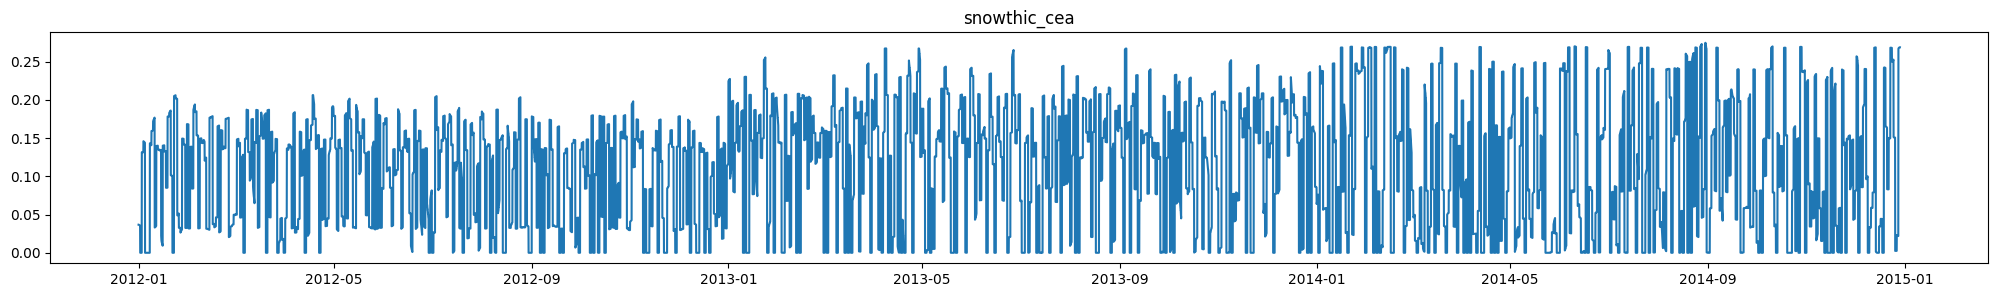

In [4]:
plt.figure()
for column in df.columns:
    plt.subplots(figsize=(25, 3))
    plt.plot(df[column])
    plt.title(column)
    plt.show()

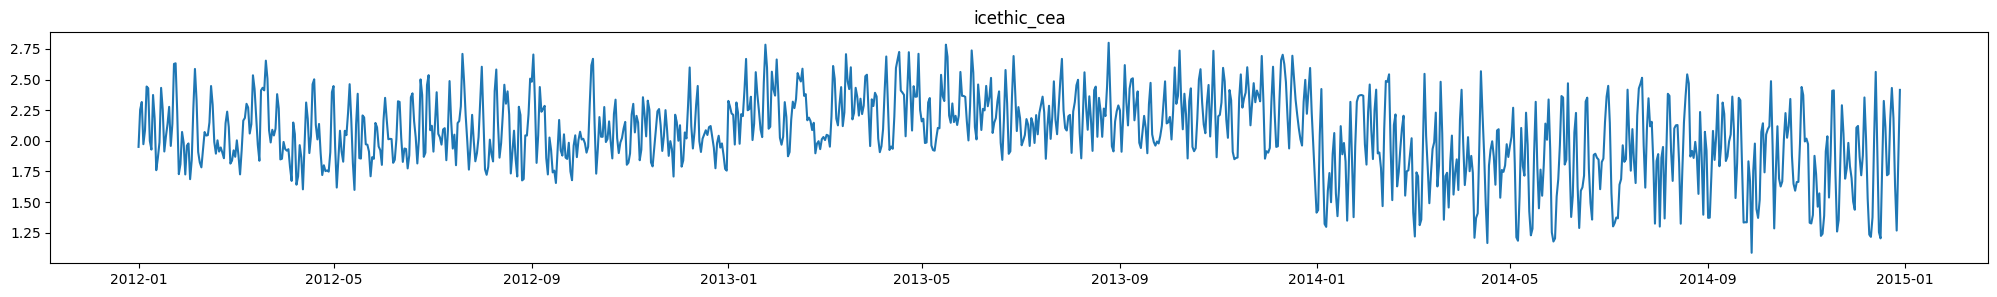

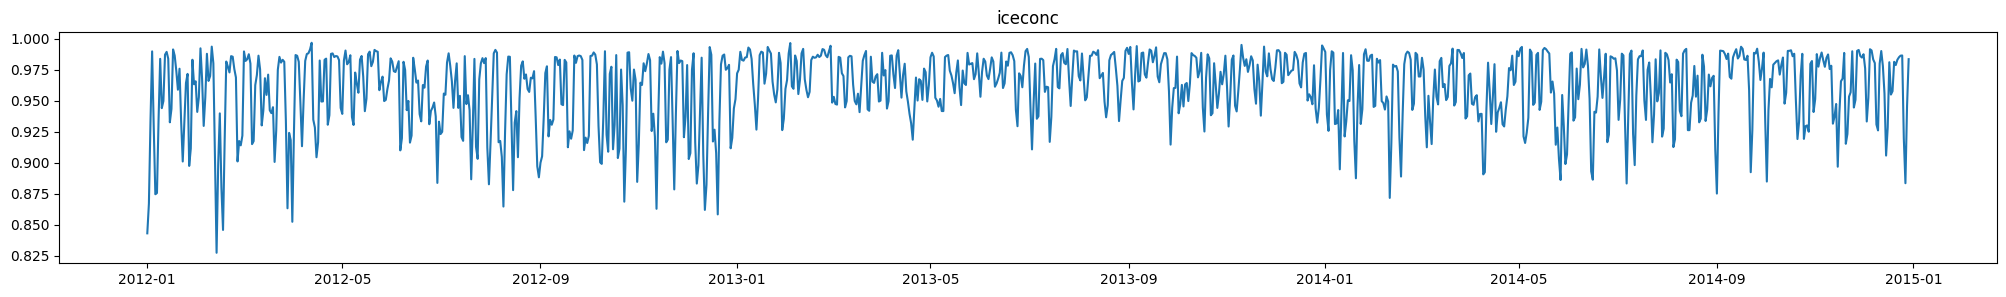

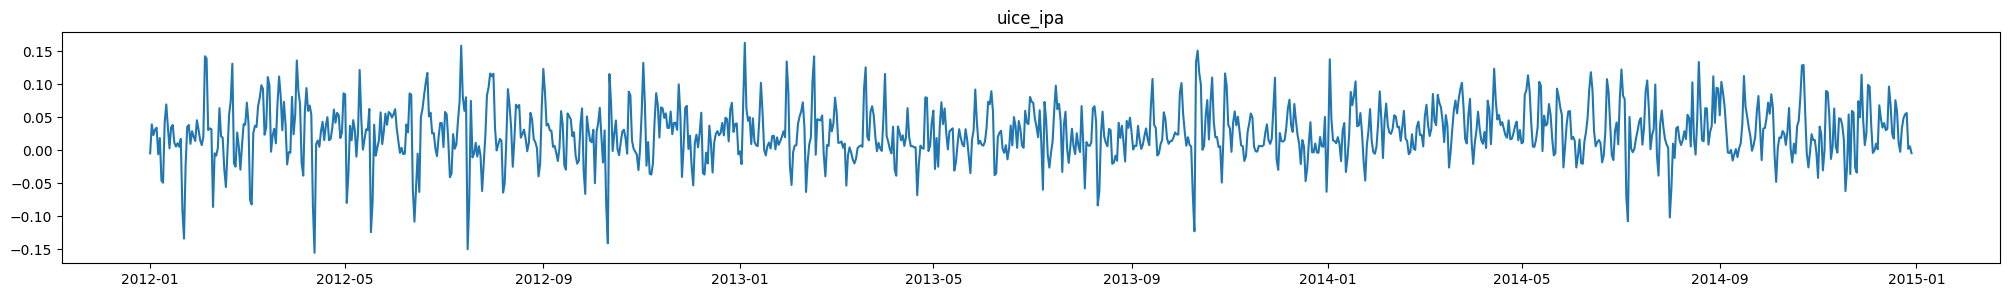

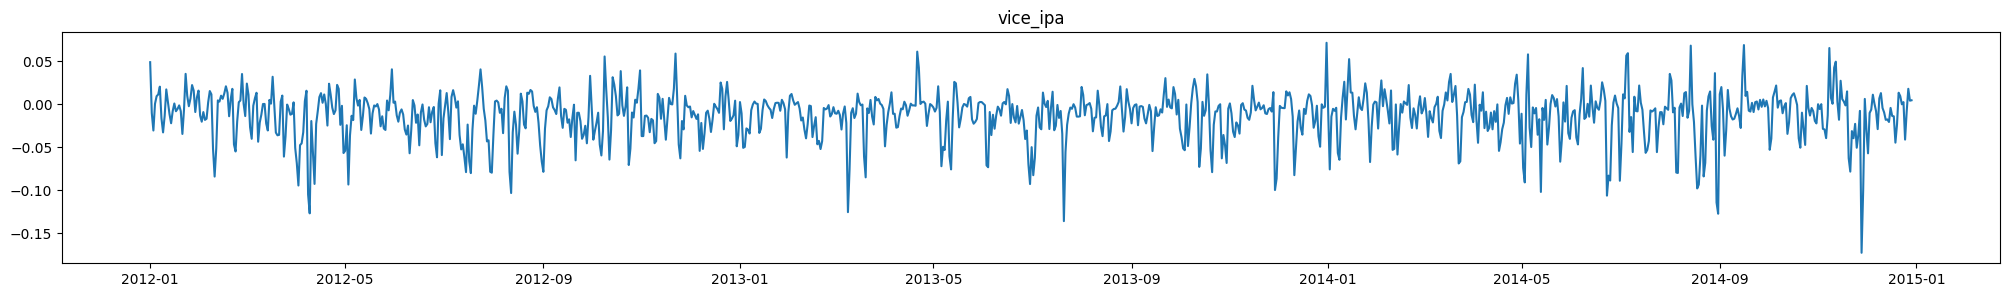

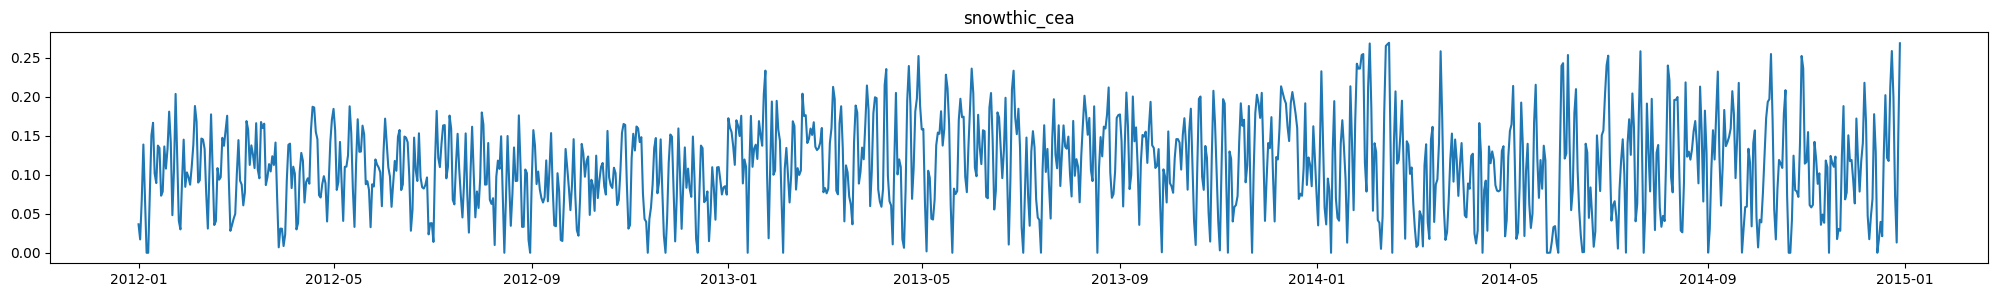

In [42]:
df['dt'] = df.index
df['dt']=df['dt'].dt.round('1d')
dc = {column: 'mean' for column in our_columns}
df_daily = df.groupby('dt').agg(dc)
for column in df_daily.columns:
    plt.subplots(figsize=(25, 3))
    plt.plot(df_daily[column])
    plt.title(column)
    plt.show()

In [43]:
def stat_tests(data):
    # Dickey-Fuller test
    result = adfuller(data, autolag='AIC')

    if result[1] > 0.05:
        answer = 'Series is not Stationary'
    else:
        answer = 'Series is Stationary'

    print(f'ADF Statistic: {round(result[0],3)}'), print(f'p-value: {round(result[1],4)}'), print(answer)

In [44]:
def norm_data(data):
    normed = (data.values - np.min(data))/(np.max(data) - np.min(data))
    return pd.Series(normed, index=data.index.values)

ADF Statistic: -8.939
p-value: 0.0
Series is Stationary
None


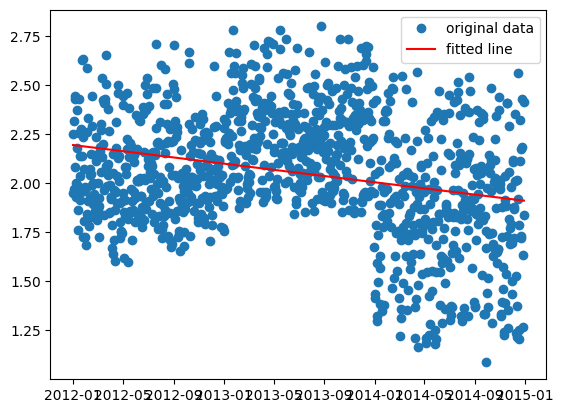

In [45]:
y = df_daily['icethic_cea']
x = np.array([x for x in range(len(y.values))])
x_grph = y.index.values
lin_reg = scp.stats.linregress(x,y)
statistics = stat_tests(x)
print(statistics)

plt.plot(x_grph, y, 'o', label='original data')
plt.plot(x_grph, lin_reg.intercept + lin_reg.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

ADF Statistic: -4.031
p-value: 0.0013
Series is Stationary
None


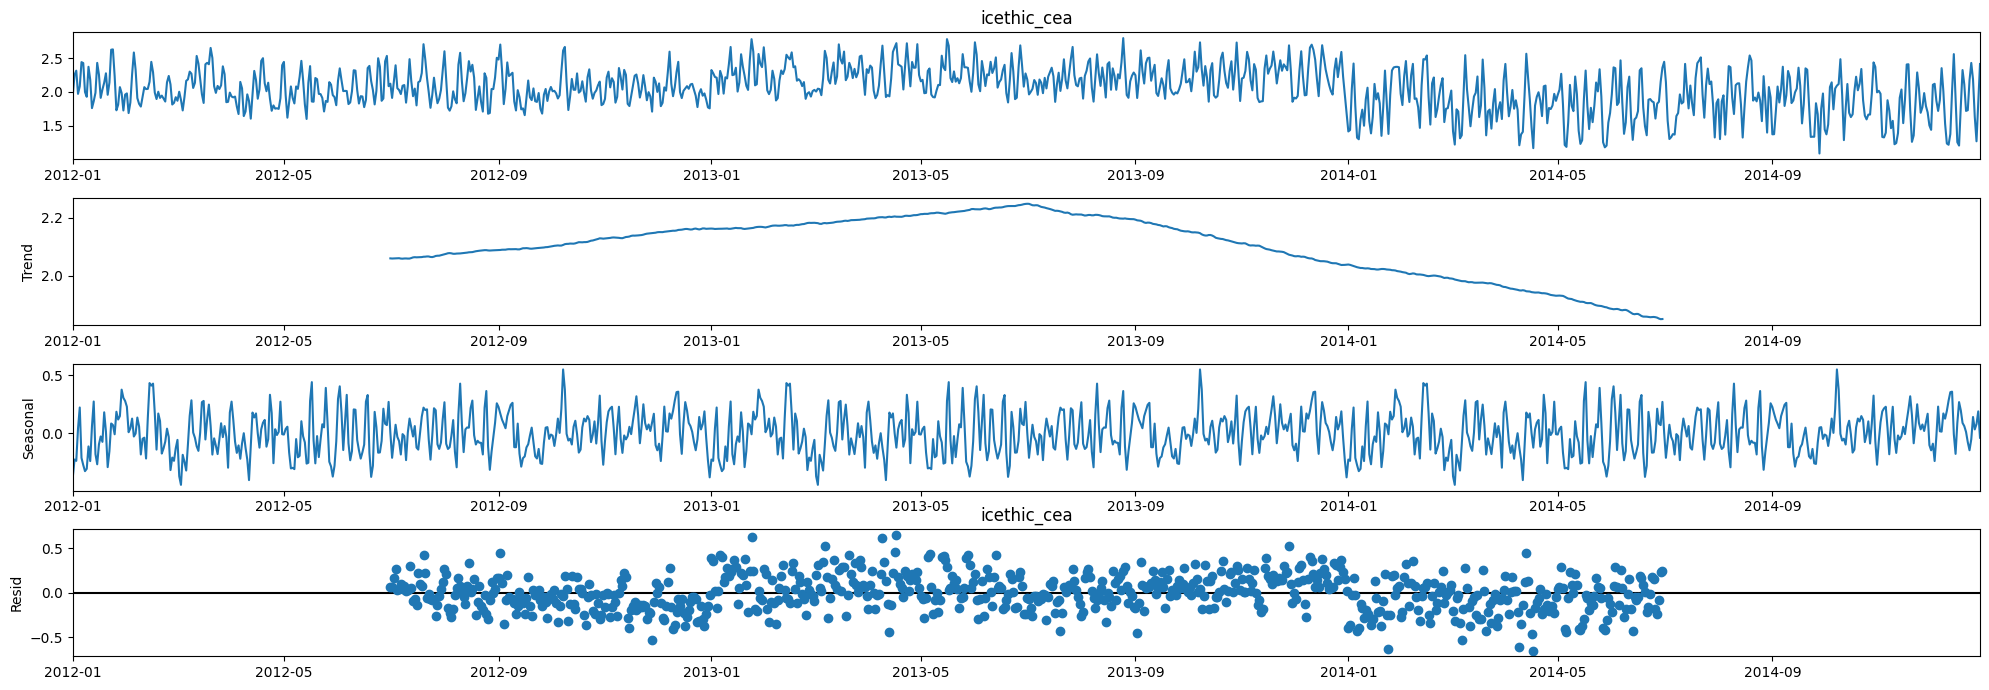

ADF Statistic: -4.406
p-value: 0.0003
Series is Stationary
None


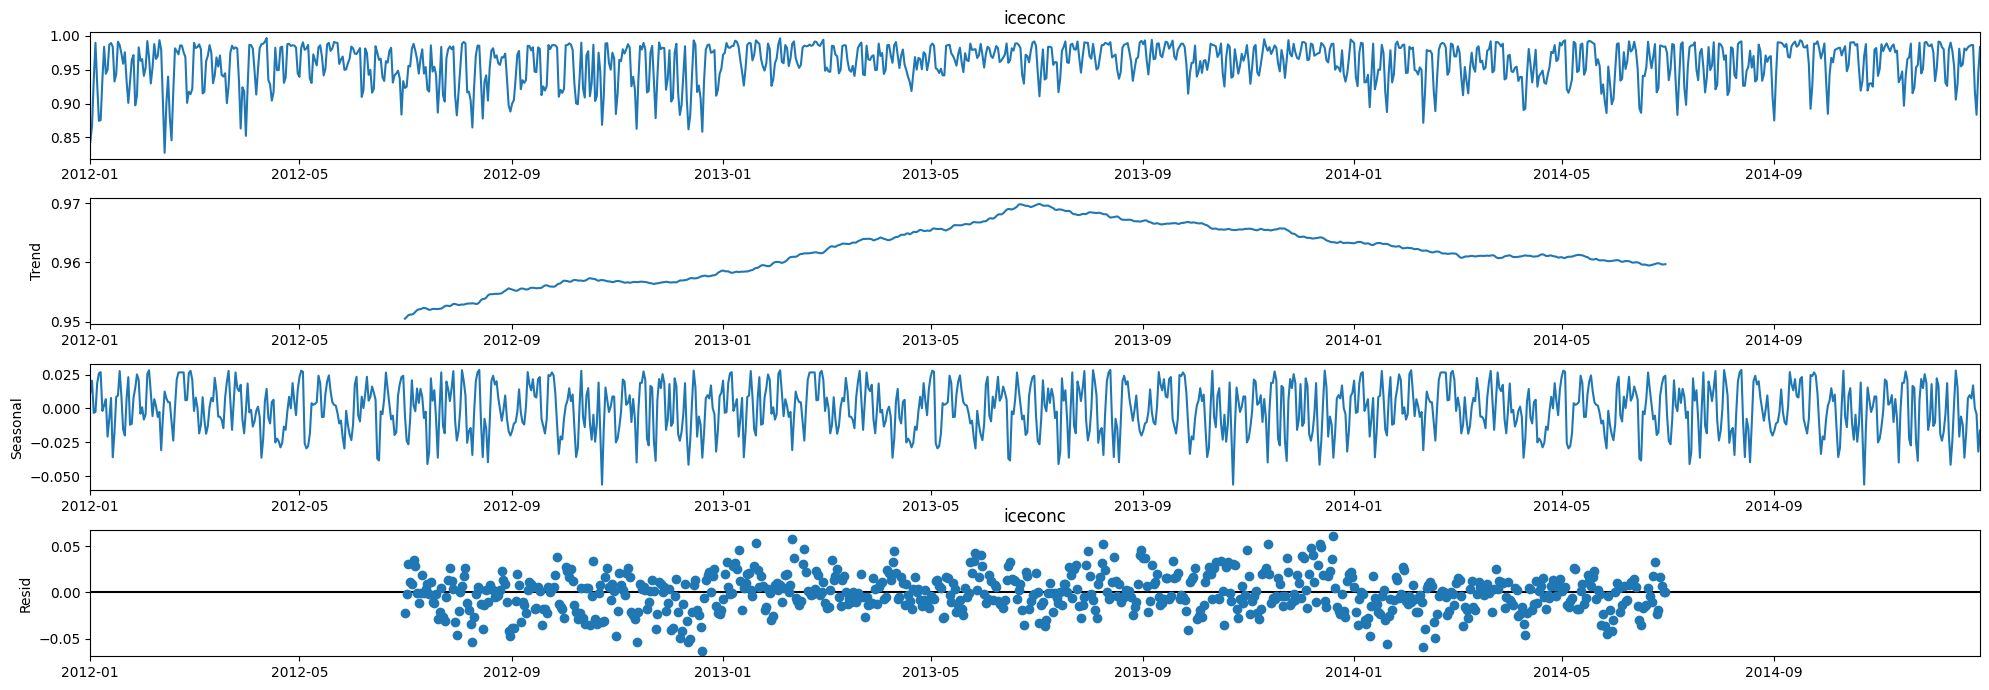

ADF Statistic: -14.467
p-value: 0.0
Series is Stationary
None


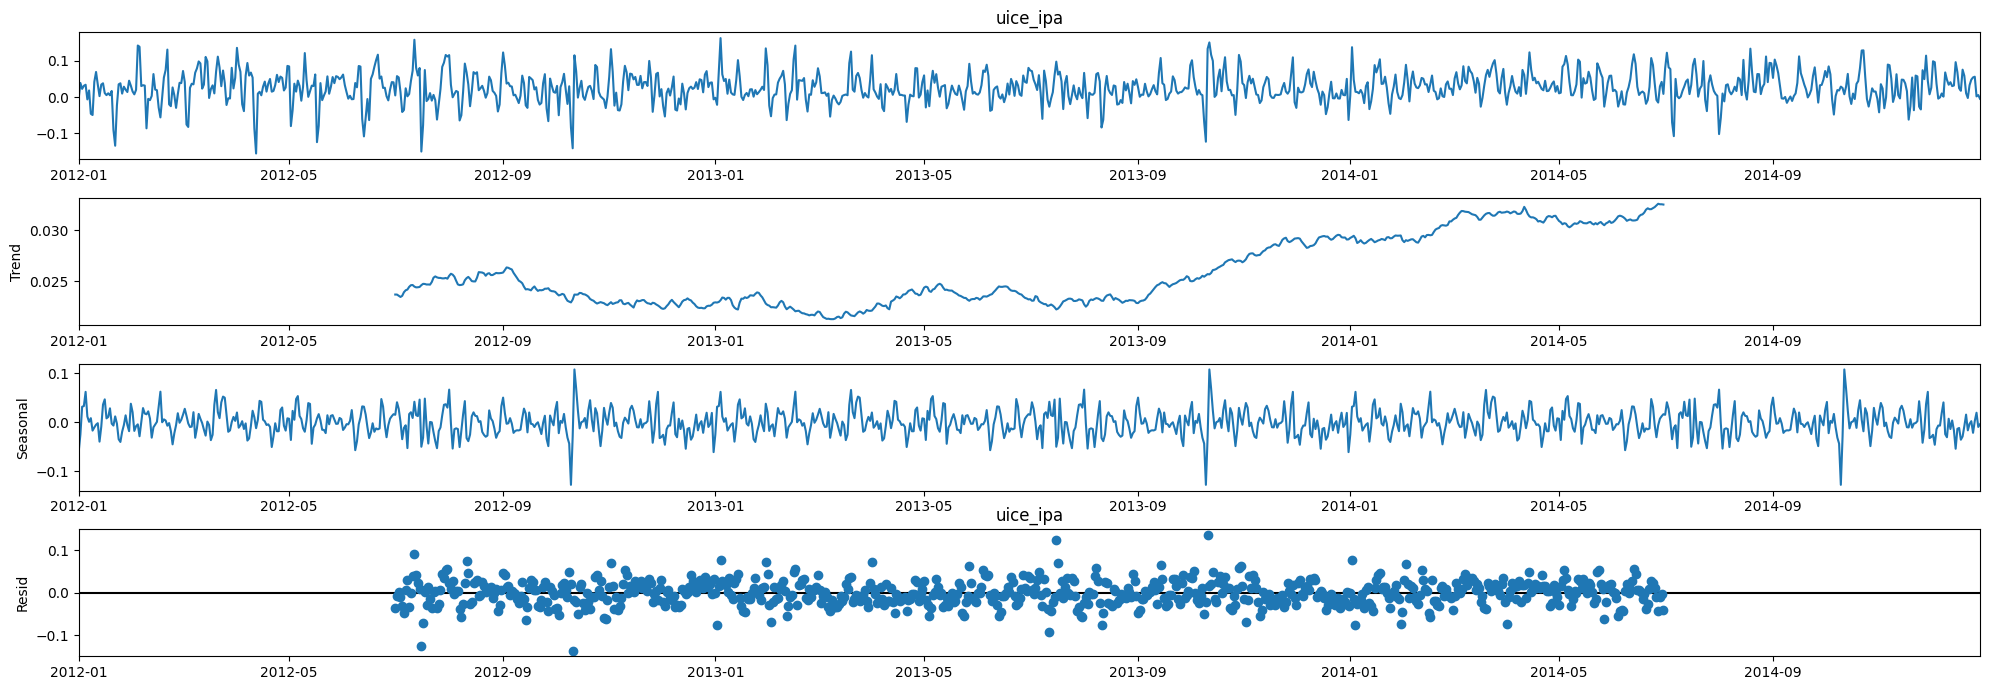

ADF Statistic: -13.453
p-value: 0.0
Series is Stationary
None


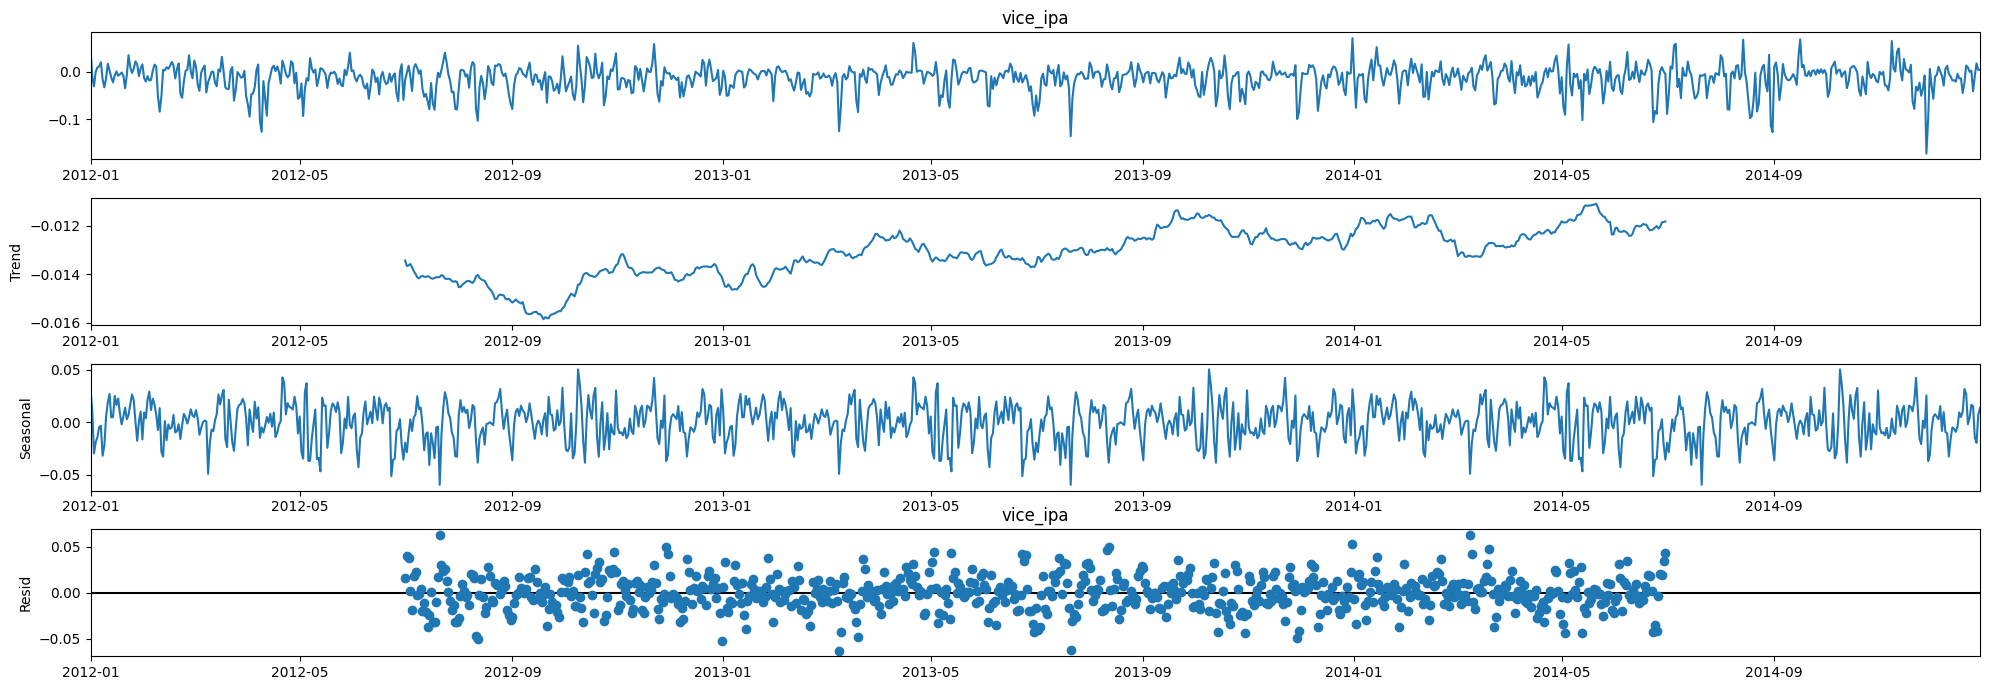

ADF Statistic: -6.016
p-value: 0.0
Series is Stationary
None


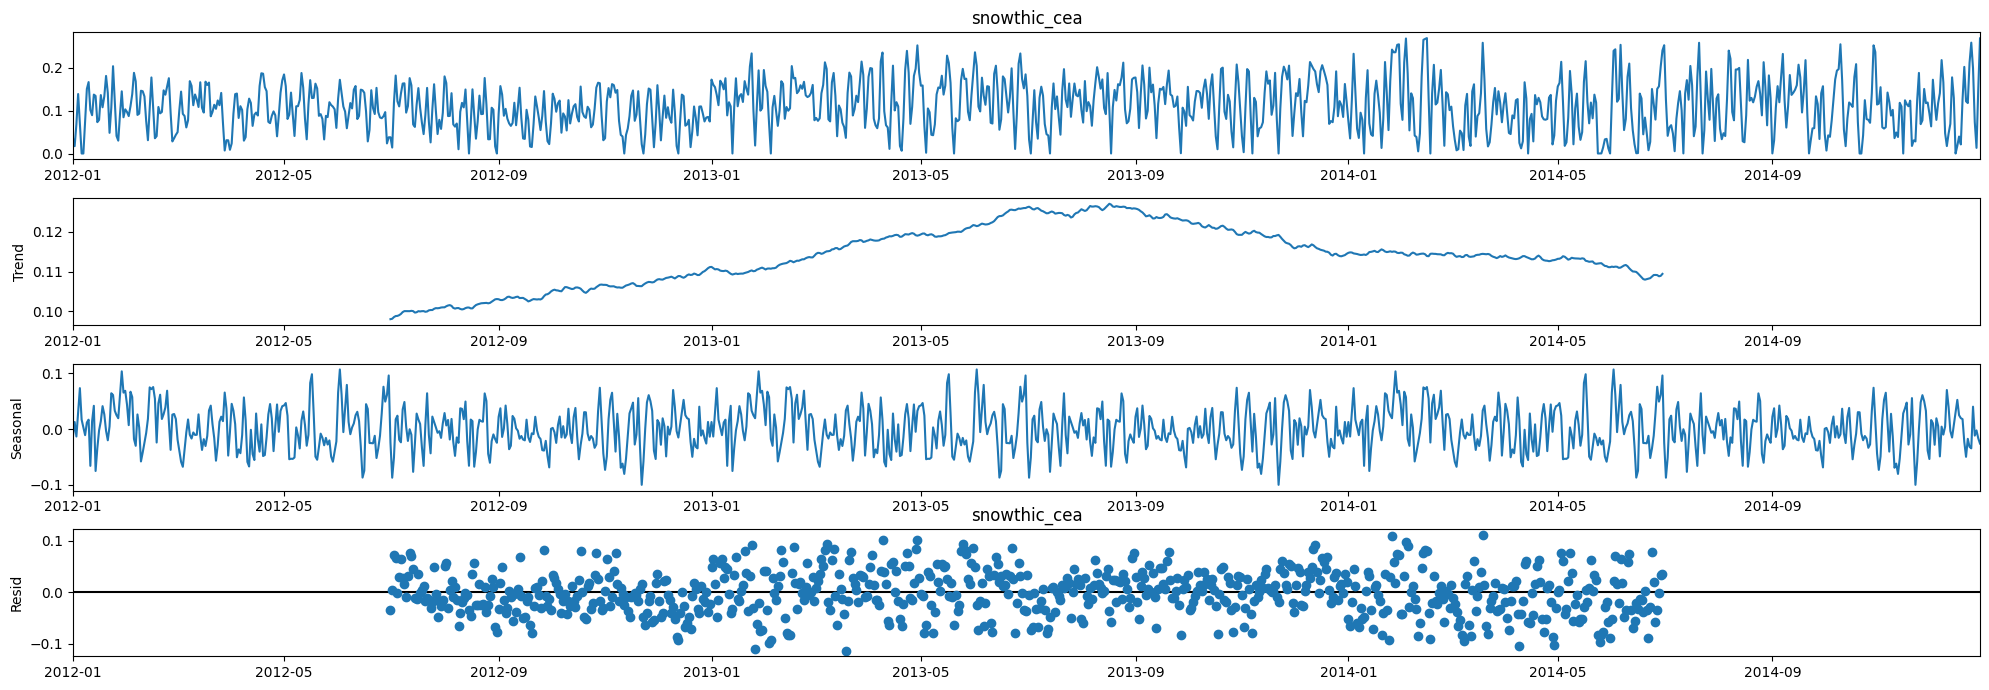

In [14]:
rcParams['figure.figsize'] = 20, 7
for column in df_daily.columns:
    statistics = stat_tests(df_daily[column])
    print(statistics)
    sm.tsa.seasonal_decompose(df_daily[column], model="additive", period=365).plot()
    plt.title(column)
    plt.show()

ADF Statistic: -4.031
p-value: 0.0013
Series is Stationary
None


ValueError: x must have 2 complete cycles requires 730 observations. x only has 366 observation(s)

AIC: 353.770, HQIC: 357.439, BIC: 363.375


D:\Games\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<Figure size 2000x700 with 0 Axes>

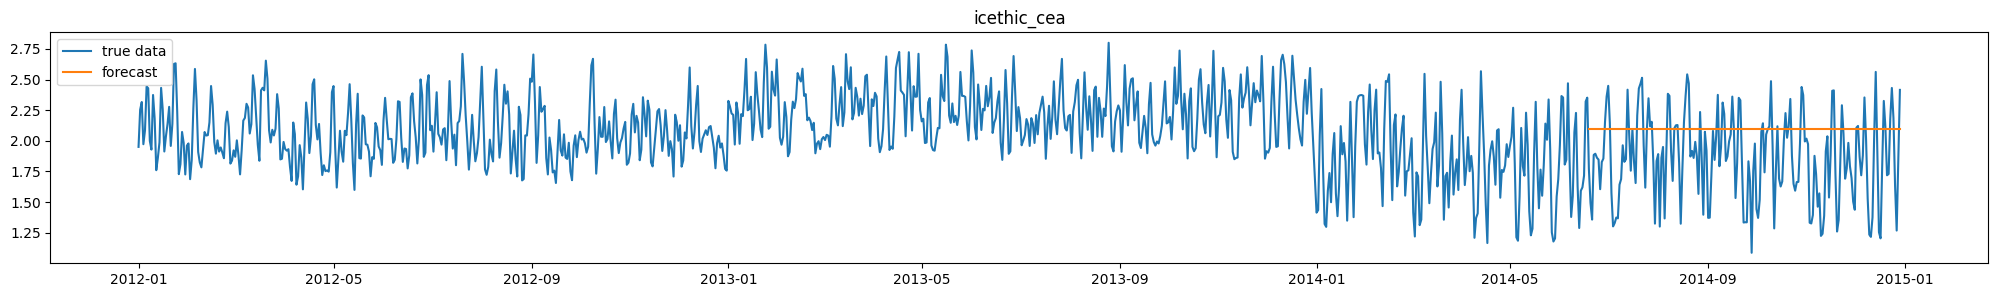

D:\Games\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


AIC: -3797.485, HQIC: -3793.816, BIC: -3787.880


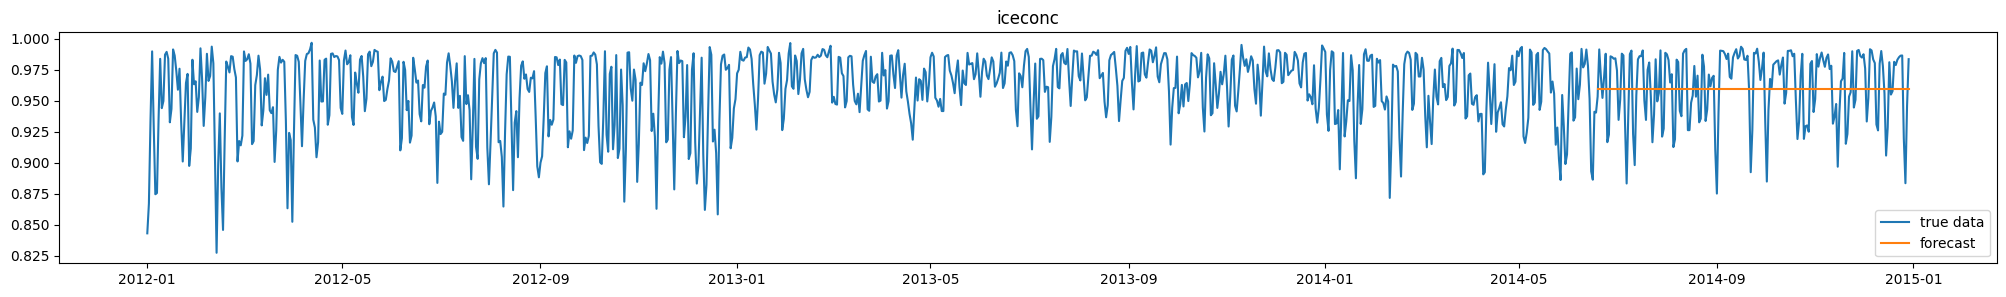

D:\Games\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


AIC: -3162.548, HQIC: -3158.879, BIC: -3152.944


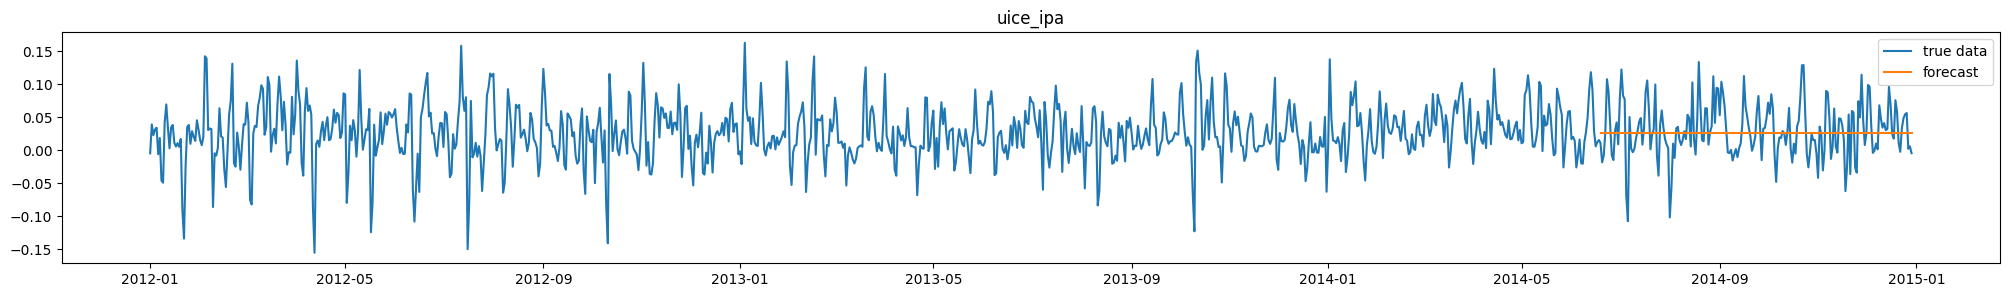

D:\Games\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


AIC: -4007.159, HQIC: -4003.490, BIC: -3997.555


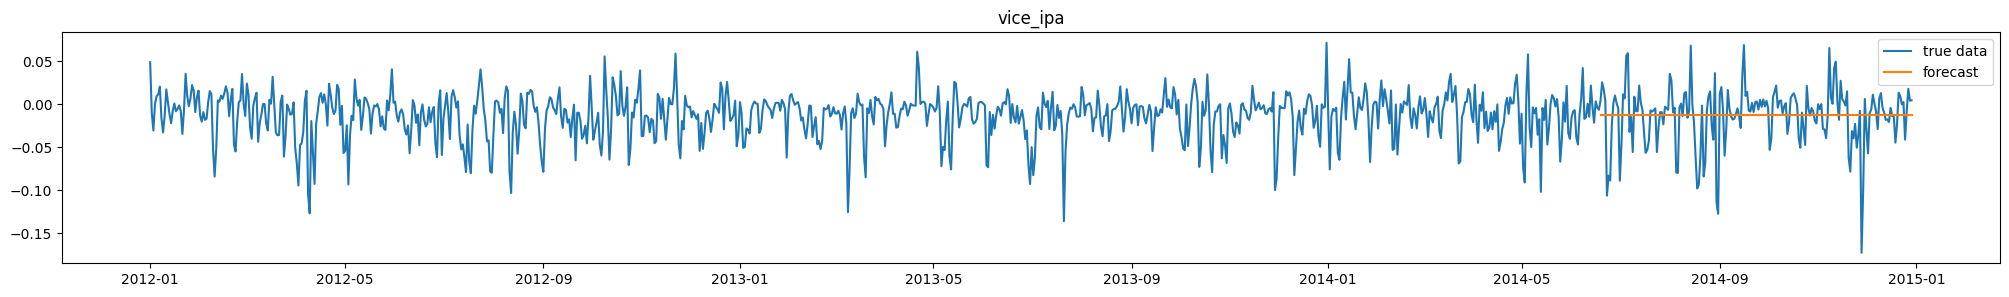

D:\Games\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


AIC: -2632.795, HQIC: -2629.126, BIC: -2623.190


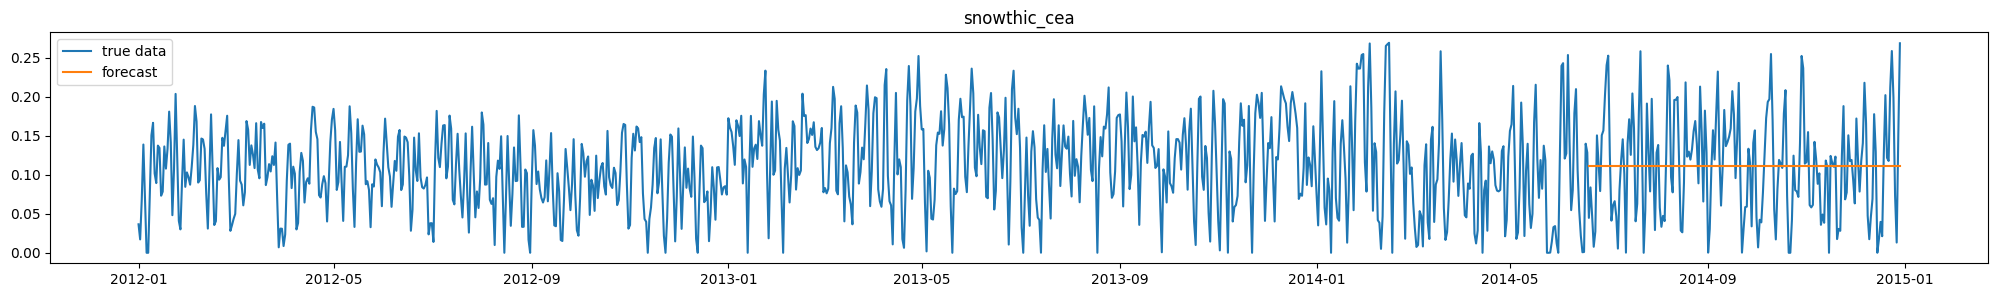

In [17]:
plt.figure()
for column in df_daily.columns:
    x = df_daily[column][:900]
    y = df_daily.index[900:]
    out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
    res = AutoReg(x, lags = 0).fit()
    print(out.format(res.aic, res.hqic, res.bic))
    predict = res.predict(y[0], y[-1])
    plt.subplots(figsize=(25, 3))
    plt.plot(df_daily[column], label = 'true data')
    plt.plot(predict, label = 'forecast')
    plt.legend()
    plt.title(column)
    plt.show()


BaseLine RMSE*100 for 30 days: 27.645
BaseLine MAPE for 30 days: 2.595


<Figure size 2000x700 with 0 Axes>

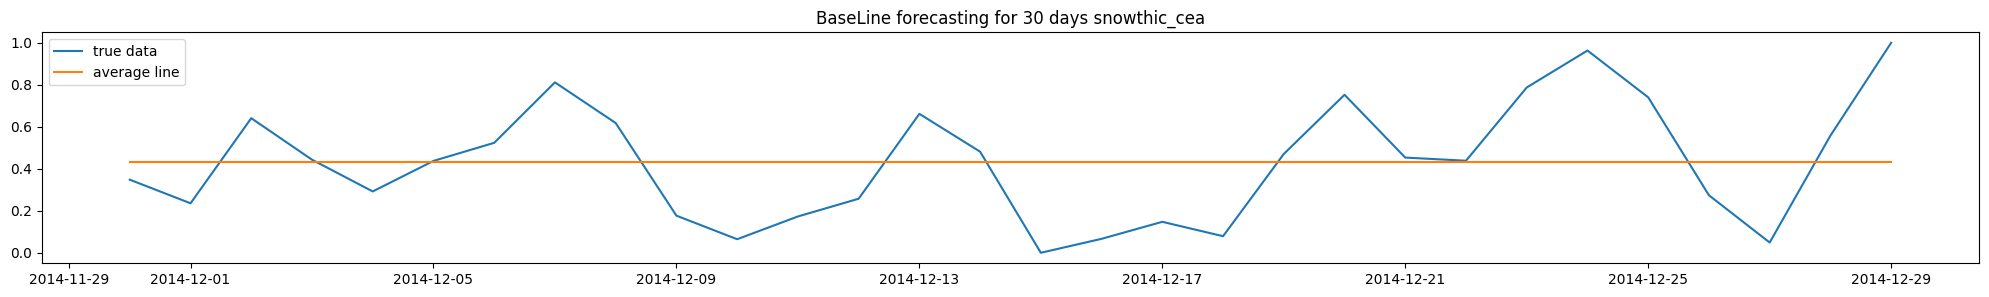

BaseLine RMSE*100 for 90 days: 24.884
BaseLine MAPE for 90 days: 38.609


<Figure size 2000x700 with 0 Axes>

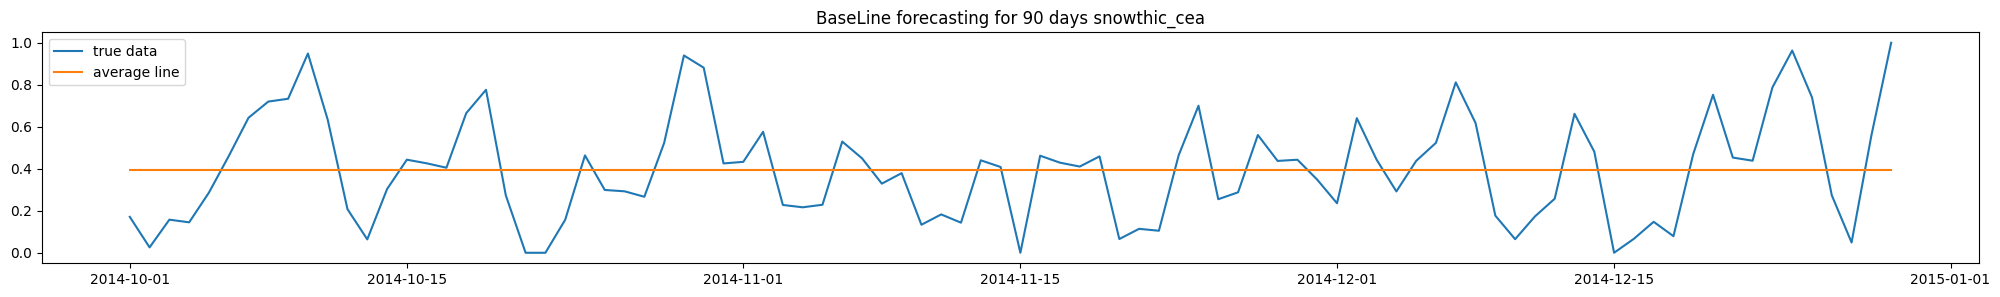

BaseLine RMSE*100 for 180 days: 24.342
BaseLine MAPE for 180 days: 30.375


<Figure size 2000x700 with 0 Axes>

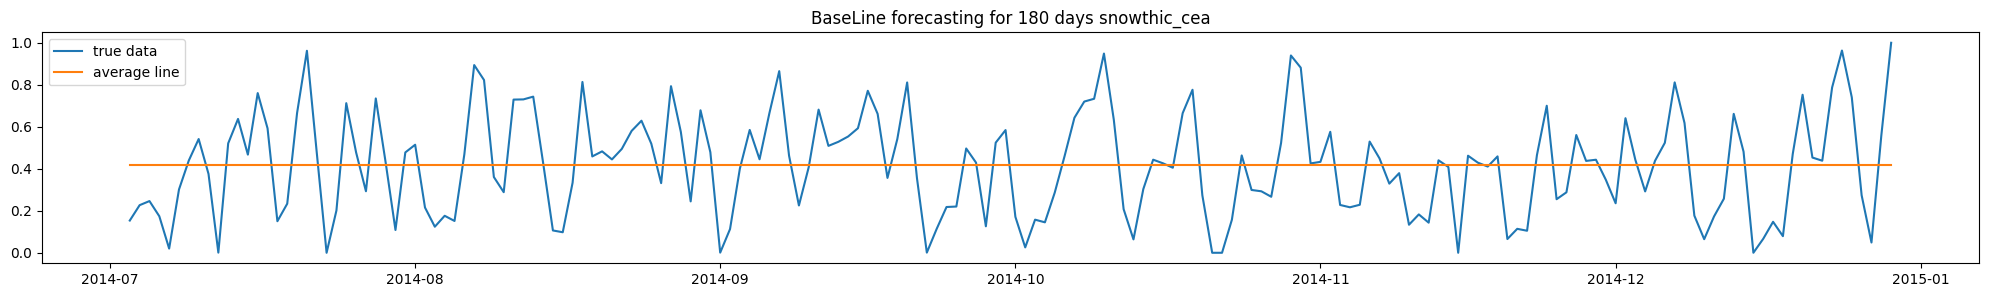

In [20]:
# baseline
print(f'')

for day_val in [30, 90, 180]:

    base_data = norm_data(df_daily['snowthic_cea'][-day_val:])
    base_predict = pd.Series(np.full((len(base_data)), np.mean(base_data)), index=[idx for idx in base_data.index])

    print(f'BaseLine RMSE*100 for {day_val} days: {round(100*mean_squared_error(base_data, base_predict, squared=False), 3)}')
    prep_data = base_data.copy()
    prep_data[prep_data < 0.0001] = 0.01
    print(f'BaseLine MAPE for {day_val} days: {round(mean_absolute_percentage_error(prep_data, base_predict), 3)}')
    
    plt.figure()
    plt.subplots(figsize=(25, 3))
    plt.plot(base_data, label = 'true data')
    plt.plot(base_predict, label = 'average line')
    plt.legend()
    plt.title(f'BaseLine forecasting for {day_val} days snowthic_cea')
    plt.show()

In [21]:
parameters = product(range(0,8), repeat=3)
parameters_list = list(parameters)
print (u"Models to analyse:", len(parameters_list))

results_ARIMA = []
best_aic_ARIMA = 10000.0

data = norm_data(df_daily['snowthic_cea'])
warnings.filterwarnings('ignore')
for param in parameters_list:
    
    #try except for the case of wrong parameters
    try:
        model_ARIMA=sm.tsa.arima.ARIMA(data, order=param).fit()
        
    #print wrong parameters and go on
    # AIC criteria: 
    except ValueError:
            continue
    aic = model_ARIMA.aic

    # save best model, aic, parameters
    if (abs(aic) < abs(best_aic_ARIMA)):
        best_model_ARIMA = model_ARIMA
        best_aic_ARIMA = aic
        best_param_ARIMA = param
        print(best_aic_ARIMA)
    results_ARIMA.append([param, model_ARIMA.aic])
    
print(f'AIC value: {best_model_ARIMA.aic}')

Models to analyse: 512
-256.40335416416656
-220.88252888417796
-210.6951765303768
-192.45856651976897
-164.9588442584312
-60.18324917786178


KeyboardInterrupt: 

In [23]:
def cross_corr(ts0, ts1, shift=0):
    ts0 = ts0[shift:]
    ts1 = ts1[0:len(ts1)-shift]

    return np.sum(ts0 * ts1) / (np.linalg.norm(ts0) * np.linalg.norm(ts1))

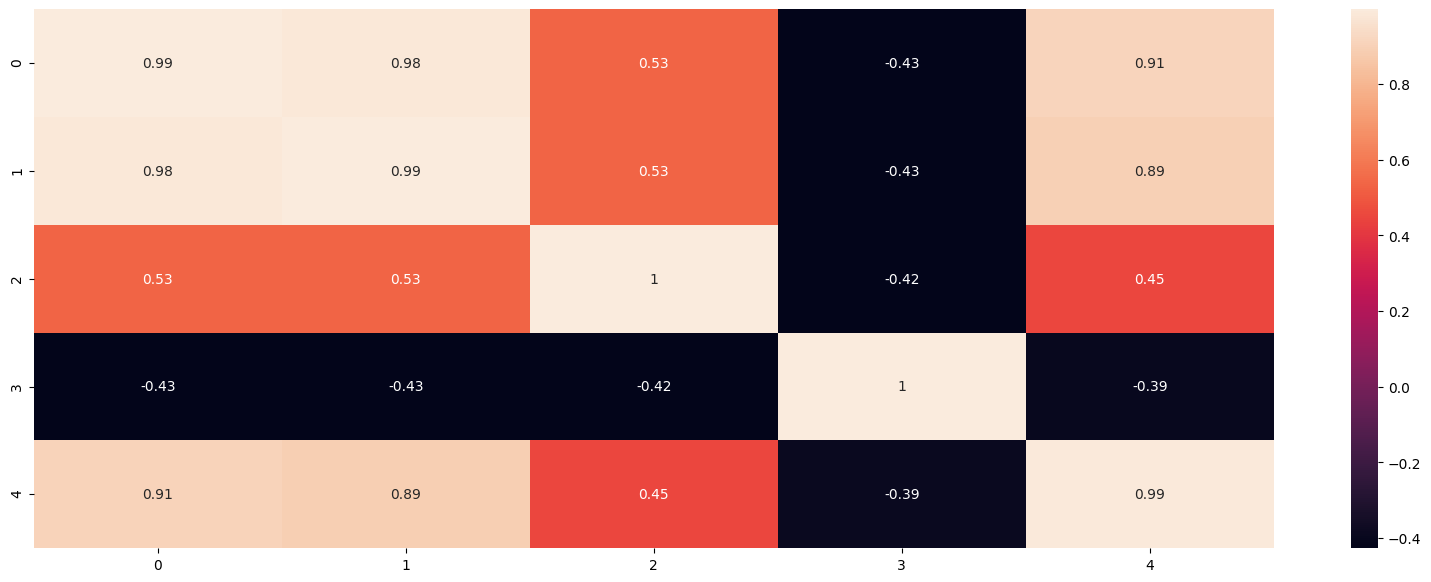

['icethic_cea', 'iceconc', 'uice_ipa', 'vice_ipa', 'snowthic_cea']


In [24]:
corr_map = np.zeros((len(our_columns), len(our_columns)))
for i, name0 in enumerate(our_columns):
    for j, name1 in enumerate(our_columns):
        corr_map[i][j] = cross_corr(df_daily[name0], df_daily[name1], shift=7)
df_corr = pd.DataFrame()
sns.heatmap(corr_map, annot=True)
plt.show()
print(our_columns)

**FEDOT**

In [7]:
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
from fedot.core.utils import fedot_project_root
from fedot.core.pipelines.node import PrimaryNode, SecondaryNode
from fedot.core.pipelines.pipeline import Pipeline

In [ ]:
def my_pipeline():
    node_sm = PrimaryNode('smoothing')
    

In [8]:
def run_ts_forecasting(fr, target_dataset, horizon: int = 30, timeout: float = None):
    feature_time_series = fr.values
    target_time_series = target_dataset.values

    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=horizon))

    # range_times = pd.date_range(start='1/1/2012', end='1/1/2013', periods=len(target_dataset))
    # range_times = target_dataset.index.values
    # range_times = feature_dataset.index.values
    idx = target_dataset.index.values
    train_input = InputData(idx=idx,
                            features=feature_time_series,
                            target=target_time_series,
                            task=task,
                            data_type=DataTypesEnum.ts)

    train_data, test_data = train_test_data_setup(train_input)

    # init model for the time series forecasting
    model = Fedot(problem='ts_forecasting',
                  task_params=task.task_params,
                  timeout=timeout)

    # run AutoML model design in the same way
    pipeline = model.fit(train_data)
    pipeline.show()

    # use model to obtain forecast
    # print(test_data)
    forecast = pipeline.predict(test_data)
    target = np.ravel(test_data.target)
    predict = np.ravel(np.array(forecast.predict))
    rmse = mean_squared_error(target, predict, squared=False)
    mae = mean_absolute_error(target, predict)
    mape = mean_absolute_percentage_error(target, predict)
    # print(model.get_metrics(metric_names=['rmse', 'mae', 'mape'], target=target))
    print(f"rmse: {rmse}, mae: {mae}, mape: {mape}")
    
    # return forecast
    return model, forecast

In [46]:
fr_year0 = df_daily['iceconc']['2012-01-01':'2013-12-31']
year0 = df_daily['uice_ipa']['2012-01-01':'2013-12-31']

Generations:   1%|          | 1/100 [00:00<?, ?gen/s]

Number of used CPU's: 1
Number of used CPU's: 1


Generations:   1%|          | 1/100 [03:45<?, ?gen/s]

Hyperparameters optimization start


  2%|▏         | 18/1000 [01:18<1:11:38,  4.38s/trial, best loss: 0.030110601952786854]
Hyperparameters optimization finished
Return tuned pipeline due to the fact that obtained metric 0.030 equal or smaller than initial (+ 5% deviation) 0.031


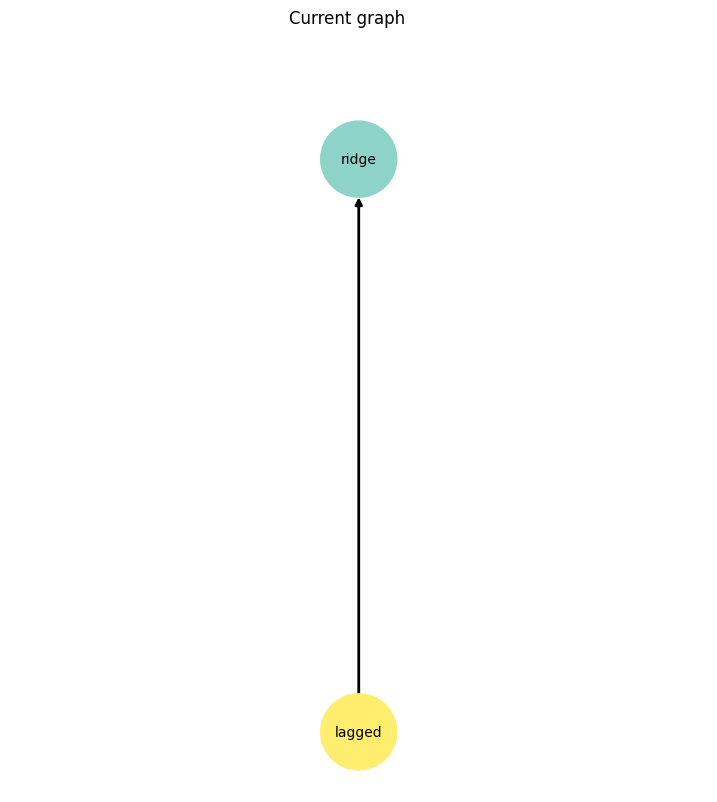

rmse: 0.03841454807087388, mae: 0.029004222899143058, mape: 3.401636260723699


In [47]:
model0, res0 = run_ts_forecasting(year0, year0, horizon=7, timeout=5.0)

Number of used CPU's: 1
Number of used CPU's: 1
Number of used CPU's: 1


Number of used CPU's: 1


Generations:   3%|▎         | 3/100 [02:30<2:01:22, 75.08s/gen]

Hyperparameters optimization start


  4%|▎         | 36/1000 [02:30<1:07:01,  4.17s/trial, best loss: 0.24901986757940806]
Hyperparameters optimization finished
Return tuned pipeline due to the fact that obtained metric 0.249 equal or smaller than initial (+ 5% deviation) 0.259


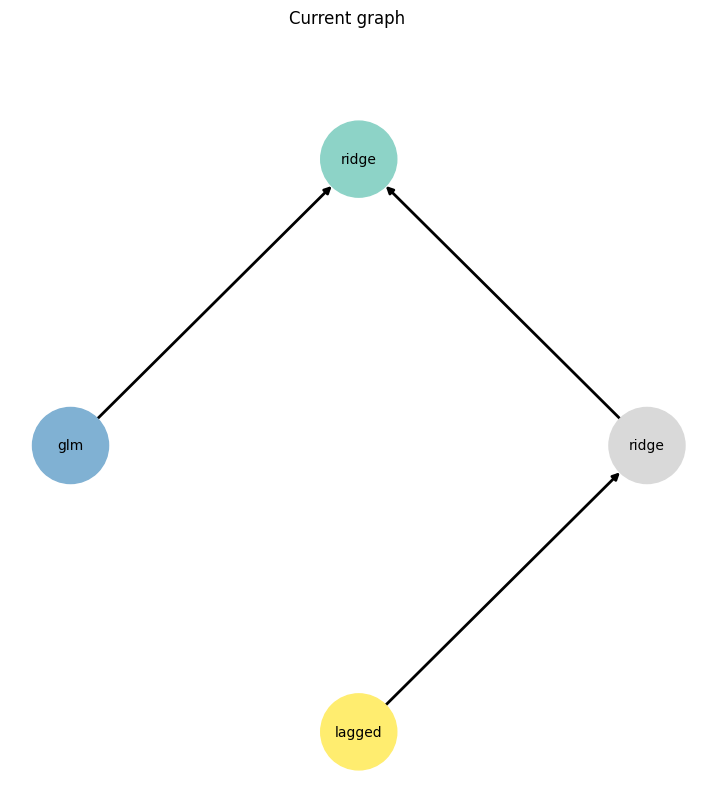

rmse: 0.30625047497997226, mae: 0.24586892504311542, mape: 0.12182985948962803


In [91]:
model1, res1 = run_ts_forecasting(fr_year0, year0, horizon=7, timeout=5.0)

Number of used CPU's: 1


Generations:   1%|          | 1/100 [11:32<?, ?gen/s]


Number of used CPU's: 1
Number of used CPU's: 1


Number of used CPU's: 1


Generations:   3%|▎         | 3/100 [06:11<5:00:30, 185.88s/gen]


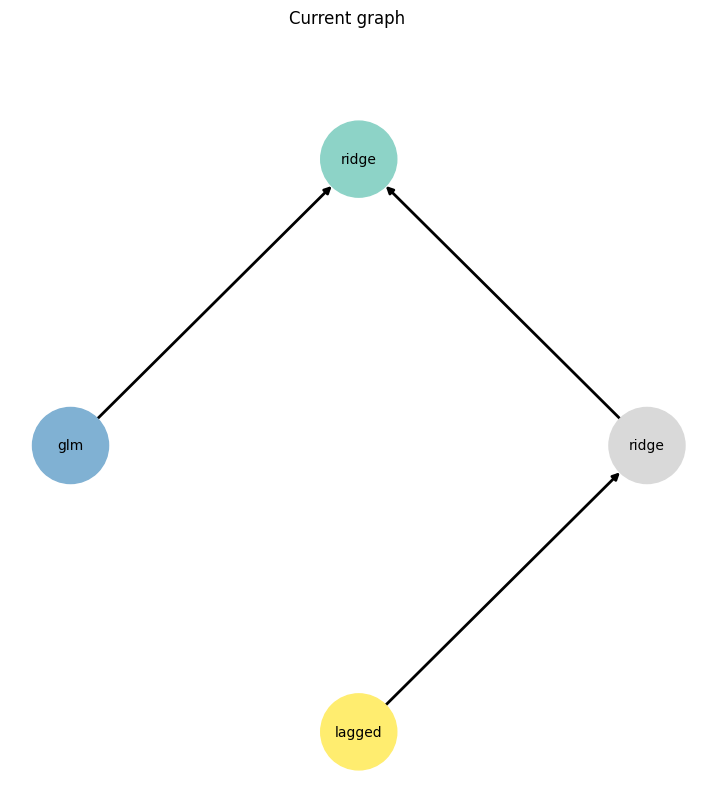

rmse: 0.3020782934468815, mae: 0.24284762831051698, mape: 0.11940743320320801


In [93]:
f23 = df_daily['snowthic_cea']['2012-01-01':'2013-12-31']
model2, res2 = run_ts_forecasting(f23, year0, horizon=7, timeout=5.0)

In [35]:
end_forecast = df_daily['icethic_cea'].copy()
errors = {'rmse': 0, 'mae': 0, 'mape': 0}
pipeline0 = model0.current_pipeline
# pipeline1 = model1.current_pipeline
# pipeline2 = model2.current_pipeline
count = 0
end_date = df_daily['iceconc'].index[-1] - pd.DateOffset(366)
for moment in pd.date_range(start='2012-01-01', end=end_date, freq='190D'):
    # current_data = norm_data(df_daily['iceconc'][moment:moment+366])
    # name_columns = ['icethic_cea', 'iceconc', 'snowthic_cea']
    # predict = []
    # for i, pipeline in enumerate([pipeline0, pipeline1, pipeline2]):
    #     current_data = df_daily[name_columns[i]][moment:moment+pd.DateOffset(366)]
    #     task = Task(TaskTypesEnum.ts_forecasting,
    #                 TsForecastingParams(forecast_length=7))
    #     forecast_data = InputData(idx=current_data.index.values, features=current_data.values, target=df_daily['icethic_cea'][moment:moment+pd.DateOffset(366)].values, task=task, data_type=DataTypesEnum.ts)
    #     train_data, test_data = train_test_data_setup(forecast_data)
    #     fr = pipeline.predict(test_data)
    #     if len(predict) == 0:
    #         predict = np.ravel(np.array(fr.predict))
    #     else:
    #         predict += np.ravel(np.array(fr.predict))
    # predict /= 3

    current_data = df_daily["icethic_cea"][moment:moment+pd.DateOffset(366)]
    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=190))
    forecast_data = InputData(idx=current_data.index.values, features=current_data.values, target=current_data.values, task=task, data_type=DataTypesEnum.ts)
    train_data, test_data = train_test_data_setup(forecast_data)
    fr = pipeline0.predict(test_data)
    # fr0 = pipeline0.predict(test_data)
    # fr1 = pipeline1.predict(test_data)
    # fr2 = pipeline2.predict(test_data)
    target = np.ravel(test_data.target)
    predict = np.ravel(np.array(fr.predict))
    # predict = (np.ravel(np.array(fr0.predict)) + np.ravel(np.array(fr1.predict)) + np.ravel(np.array(fr2.predict)))/3
    rmse = mean_squared_error(target, predict, squared=False)
    mae = mean_absolute_error(target, predict)
    mape = mean_absolute_percentage_error(target, predict)
    # print(model.get_metrics(metric_names=['rmse', 'mae', 'mape'], target=target))
    # print(f"rmse: {rmse}, mae: {mae}, mape: {mape}")
    try:
        end_forecast[moment+pd.DateOffset(366):moment+pd.DateOffset(366+189)] = predict
    except:
        print(len(predict))
    count += 1
    errors['rmse'] += rmse
    errors['mae'] += mae
    errors['mape'] += mape

print(errors['rmse'] / count, errors['mae'] / count, errors['mape']/count)


--- Logging error ---
Traceback (most recent call last):
  File "D:\Games\Anaconda3\lib\logging\__init__.py", line 1084, in emit
    stream.write(msg + self.terminator)
ValueError: I/O operation on closed file.
Call stack:
  File "D:\Games\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Games\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Games\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "D:\Games\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "D:\Games\Anaconda3\lib\asyncio\base_events.py", line 570, in run_fo

ValueError: X has 2 features, but Lasso is expecting 130 features as input.

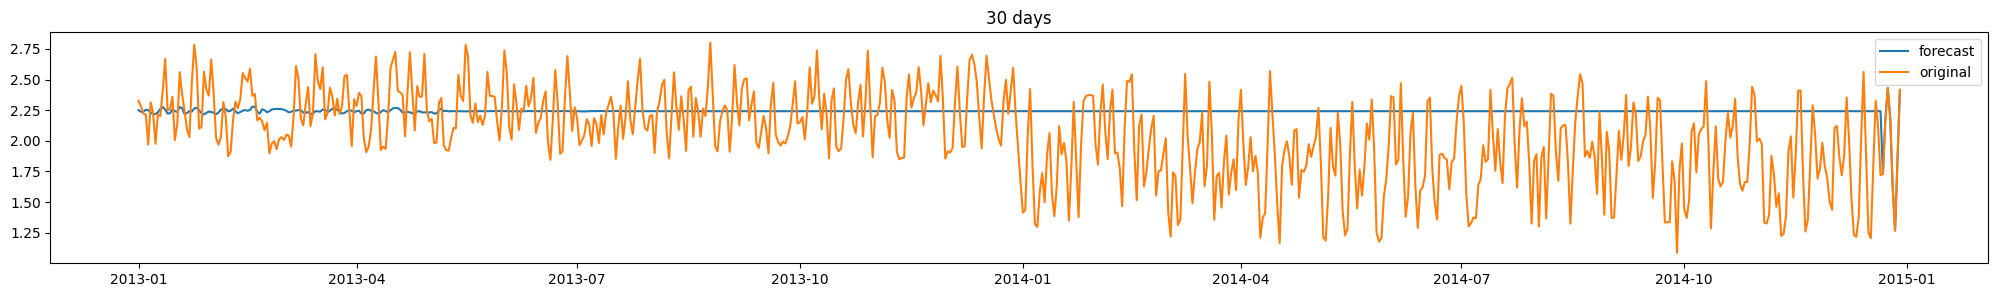

In [33]:
plt.subplots(figsize=(25, 3))
plt.plot(end_forecast['2013-01-01':], label='forecast')
plt.plot(df_daily['icethic_cea']['2013-01-01':], label='original')
plt.legend()
plt.title("30 days")
# plt.savefig("icethic_ceaf30.png")
plt.show()

In [101]:
models = []
end_date = year0.index[-1] - pd.DateOffset(30)
for moment in pd.date_range(start='2012-01-01', end=end_date, freq='1M'):
    mnth = year0[moment:moment+pd.DateOffset(30)]
    model, res = run_ts_forecasting(mnth, mnth, horizon=7, timeout=5.0)
    models.append(model.current_pipeline)

Number of used CPU's: 1
Metric evaluation error: index -7 is out of bounds for axis 0 with size 5
Number of used CPU's: 1
Metric evaluation error: index -7 is out of bounds for axis 0 with size 5


--- Logging error ---
Traceback (most recent call last):
  File "D:\Games\Anaconda3\lib\logging\__init__.py", line 1084, in emit
    stream.write(msg + self.terminator)
ValueError: I/O operation on closed file.
Call stack:
  File "D:\Games\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Games\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Games\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "D:\Games\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "D:\Games\Anaconda3\lib\asyncio\base_events.py", line 570, in run_fo

Number of used CPU's: 1


--- Logging error ---
Traceback (most recent call last):
  File "D:\Games\Anaconda3\lib\logging\__init__.py", line 1084, in emit
    stream.write(msg + self.terminator)
ValueError: I/O operation on closed file.
Call stack:
  File "D:\Games\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Games\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Games\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "D:\Games\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "D:\Games\Anaconda3\lib\asyncio\base_events.py", line 570, in run_fo

Number of used CPU's: 1


--- Logging error ---
Traceback (most recent call last):
  File "D:\Games\Anaconda3\lib\logging\__init__.py", line 1084, in emit
    stream.write(msg + self.terminator)
ValueError: I/O operation on closed file.
Call stack:
  File "D:\Games\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Games\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Games\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "D:\Games\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "D:\Games\Anaconda3\lib\asyncio\base_events.py", line 570, in run_fo

Number of used CPU's: 1


--- Logging error ---
Traceback (most recent call last):
  File "D:\Games\Anaconda3\lib\logging\__init__.py", line 1084, in emit
    stream.write(msg + self.terminator)
ValueError: I/O operation on closed file.
Call stack:
  File "D:\Games\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Games\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Games\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "D:\Games\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "D:\Games\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "D:\Games\Anaconda3\lib\asyncio\base_events.py", line 570, in run_fo

KeyboardInterrupt: 